Initial dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

<ipython-input-8-d44dce797f79>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_dept.values, y=avg_salary_by_dept.index, palette='viridis')


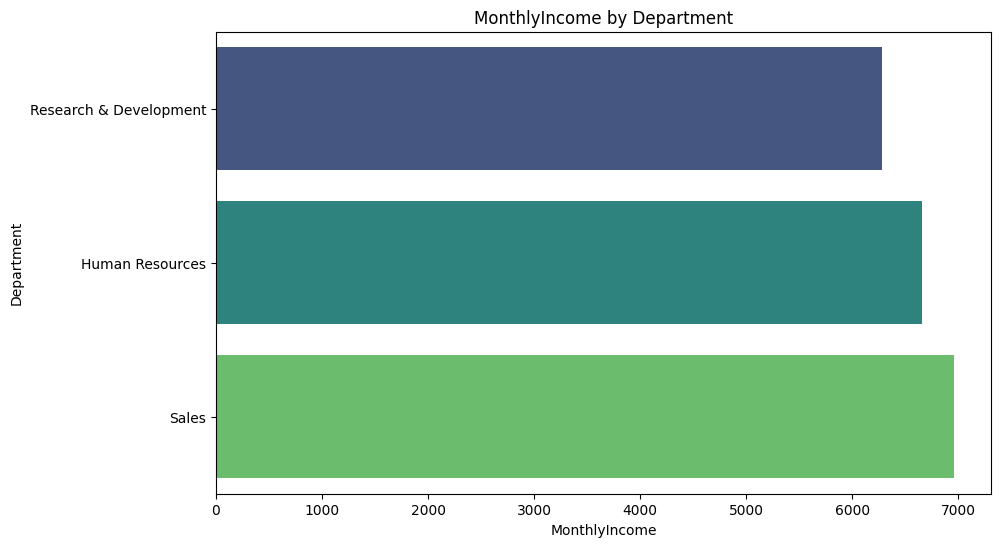

<ipython-input-8-d44dce797f79>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Department', y='PerformanceRating', palette='viridis')


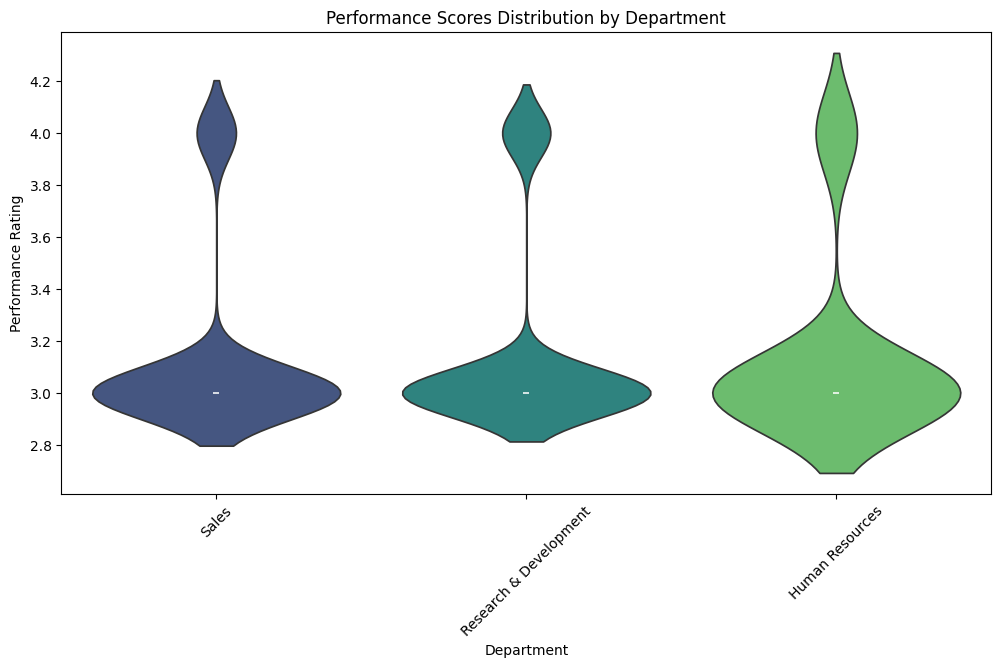

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'HR_data.csv'  # Replace with the path to your dataset
df = pd.read_csv('/content/HR Data.csv')

# Display the initial few rows of the dataset
print("Initial dataset:")
print(df.head())

# 1. Removing unnecessary columns (e.g., 'Notes')
columns_to_remove = ['MaritalStatus']
df.drop(columns=columns_to_remove, inplace=True)

# 2. Renaming columns
columns_rename = {
    'BusinessTravel' : 'Frequency of Travel',
    'EducationField'  : 'Domain',
    'JobRole' : 'Designation',
    'Over18' : 'Above 18'
}
df.rename(columns=columns_rename, inplace=True)

# 3. Eliminating redundant entries (duplicates)
df.drop_duplicates(inplace=True)

# 4. Sanitizing specific columns (e.g., removing leading/trailing spaces from 'EmployeeName')
df['Domain'] = df['Domain'].str.strip()


# 5. Eliminating NaN values
df.dropna(inplace=True)

# 6. Additional changes (e.g., ensuring 'EmpSalary' is numeric and correcting data types)
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')
df['YearsAtCompany'] = pd.to_numeric(df['YearsAtCompany'], errors='coerce')

# Re-check for any remaining NaN values after type conversion
df.dropna(inplace=True)

# Display the cleaned dataset
print("Cleaned dataset:")
print(df.head())

# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'Cleaned_HR_data.csv'
df.to_csv(cleaned_file_path, index=False)

#MonthlyIncome per Department
plt.figure(figsize=(10, 6))
avg_salary_by_dept = df.groupby('Department')['MonthlyIncome'].mean().sort_values()
sns.barplot(x=avg_salary_by_dept.values, y=avg_salary_by_dept.index, palette='viridis')
plt.title('MonthlyIncome by Department')
plt.xlabel('MonthlyIncome')
plt.ylabel('Department')
plt.show()

#Distribution of Performance Rating
# Visualization 3: Violin Plot of Performance Scores by Department
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Department', y='PerformanceRating', palette='viridis')
plt.title('Performance Scores Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Performance Rating')
plt.xticks(rotation=45)
plt.show()